<a href="https://colab.research.google.com/github/LatifaAlnaim1996/ML/blob/main/AssighnmentSunday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Assignment

## Deleverables

# * EDA 
- Tell / show me about your data
- Etc...
* Data prep / wrangling
- pick & prep your features
- train_test_split()
- Etc...

# * Model
- Import and make a DecisionTreeClassifier()
- Bonus: GridSearchCV() or RandomizedSearchCV()
- Bonus: RandomForestClassifier()
- Explain what's going on..

# * Score your model
- Accuracy
- Confusion matrix
- Etc...

# * Display your decision tree with plot_tree() (or similar)
- Explain your tree
- Etc...

# **Latifa Alnaim**

In [3]:
%%capture
!pip install category-encoders
import pandas as pd
import numpy as np
import graphviz
cs = cm.PuBuGn(np.arange(3)/3.)
from sklearn.tree import plot_tree
from sklearn import tree
from sklearn import model_selection
from matplotlib import cm
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import category_encoders as ce
import matplotlib.pyplot as plt




In [6]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.names

1. Title: Car Evaluation Database

2. Sources:
   (a) Creator: Marko Bohanec
   (b) Donors: Marko Bohanec   (marko.bohanec@ijs.si)
               Blaz Zupan      (blaz.zupan@ijs.si)
   (c) Date: June, 1997

3. Past Usage:

   The hierarchical decision model, from which this dataset is
   derived, was first presented in 

   M. Bohanec and V. Rajkovic: Knowledge acquisition and explanation for
   multi-attribute decision making. In 8th Intl Workshop on Expert
   Systems and their Applications, Avignon, France. pages 59-78, 1988.

   Within machine-learning, this dataset was used for the evaluation
   of HINT (Hierarchy INduction Tool), which was proved to be able to
   completely reconstruct the original hierarchical model. This,
   together with a comparison with C4.5, is presented in

   B. Zupan, M. Bohanec, I. Bratko, J. Demsar: Machine learning by
   function decomposition. ICML-97, Nashville, TN. 1997 (to appear)

4. Relevant Information Paragraph:

   Car Evaluation Database was 

In [9]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data", 
names=["price", "maint", "doors", "persons", "lug_boot", "safety" , 'target'],)
df.head()

,price,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [10]:
encoder = ce.OrdinalEncoder()
df_encode = encoder.fit_transform(df)
df_encode.head()

,price,maint,doors,persons,lug_boot,safety,target
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,1,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1


# EDA :: 

In [17]:
df.describe()

,price,maint,doors,persons,lug_boot,safety,target
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,high,high,2,more,med,high,unacc
freq,432,432,432,576,576,576,1210


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   price     1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   target    1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [13]:
df.shape

(1728, 7)

In [14]:
df.keys()

Index(['price', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'target'], dtype='object')

In [15]:
df.target.value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: target, dtype: int64

In [18]:
corr = df_encode.corr()
corr.style.background_gradient(cmap='PuBuGn')

,price,maint,doors,persons,lug_boot,safety,target
price,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.286532
maint,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.254656
doors,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.056475
persons,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.336842
lug_boot,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.121453
safety,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.402313
target,0.286532,0.254656,0.056475,0.336842,0.121453,0.402313,1.000000


In [19]:
df_encode.isnull().sum()

price       0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
target      0
dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
x = df_encode['price']
y = df_encode['safety']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7)

In [25]:
C_Safty = df.safety.value_counts()

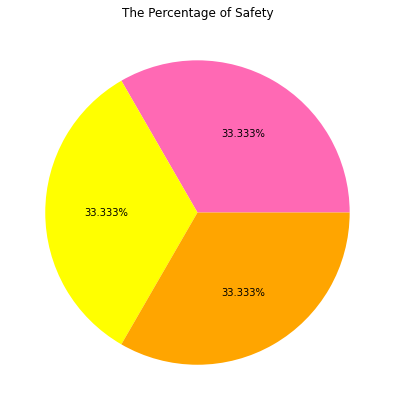

In [43]:
plt.figure(figsize=[7,7])
mycolors = ["hotpink", "yellow", "orange" ]

plt.pie(count_safety,
autopct='%1.3f%%', colors=mycolors)


plt.title("The Percentage of Safety");


# **Split Data ::**

In [45]:
a = df_encode.drop(['target'], axis=1)
b = df_encode.target

In [46]:
y_train.head()


1497    1
577     2
346     2
586     2
962     3
Name: safety, dtype: int64

# **Decision Tree ::**

In [51]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(pd.DataFrame(x_train), y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [56]:
DT.predict(pd.DataFrame(x_test))

array([1, 2, 2, 2, 1, 1, 2, 3, 2, 1, 2, 1, 2, 1, 1, 2, 2, 3, 2, 2, 2, 1,
       1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 3, 3, 1, 2,
       2, 2, 3, 2, 2, 3, 2, 2, 3, 1, 3, 3, 2, 2, 3, 1, 2, 2, 1, 3, 1, 2,
       2, 2, 1, 3, 2, 1, 2, 2, 2, 2, 1, 3, 2, 3, 2, 2, 3, 1, 2, 3, 2, 2,
       3, 3, 2, 1, 2, 1, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 1, 1, 3, 2, 2,
       1, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 3, 1, 1, 3, 3, 1, 2,
       2, 3, 2, 2, 1, 2, 2, 2, 1, 2, 2, 3, 3, 2, 2, 2, 2, 3, 1, 2, 2, 2,
       3, 2, 1, 3, 2, 3, 3, 1, 2, 2, 3, 2, 3, 3, 1, 2, 2, 2, 3, 2, 2, 1,
       1, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 3, 2, 1, 1, 3, 1, 3, 2,
       1, 3, 1, 3, 2, 3, 1, 1, 2, 1, 2, 1, 2, 3, 3, 3, 3, 3, 2, 2, 3, 1,
       2, 3, 2, 2, 1, 2, 3, 3, 1, 3, 2, 2, 2, 1, 2, 2, 1, 1, 2, 3, 3, 2,
       2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 1, 2, 2, 2, 3,
       1, 1, 3, 3, 2, 1, 3, 2, 2, 2, 2, 3, 2, 2, 1, 1, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2,

In [57]:
DT.feature_importances_

array([1.])

In [63]:
df_encode.columns

Index(['price', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'target'], dtype='object')

In [68]:
results = []
names = []
models = []
models.append(('The Decision Tree', DecisionTreeClassifier()))

scoring = 'accuracy'

for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=None)
  cv_results = model_selection.cross_val_score(model, pd.DataFrame(x_train), y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

The Decision Tree: 0.270475 (0.023424)


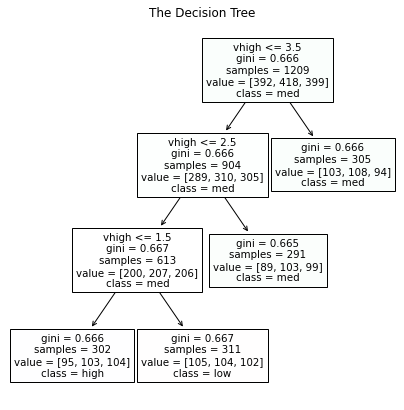

In [69]:
plt.figure(figsize=(7,7))
tree.plot_tree(dtc, feature_names=df.price, class_names=df.safety, filled=True);
plt.title('The Decision Tree');

## **Confiusion Matrix ::**

In [70]:
df.target.value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: target, dtype: int64

## **GridSearchCV ::**

In [75]:
from sklearn.model_selection import GridSearchCV

p_grid = {'criterion': ['entropy','gini'],
          'splitter': [ 'random','best'],
          'max_depth':[5,10,15,20]
           }

grid = GridSearchCV( DecisionTreeClassifier(), p_grid)

In [76]:
grid.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Expected 2D array, got 1D array instead:
array=[2. 2. 1. 1. 1. 1. 2. 1. 3. 3. 2. 4. 2. 2. 4. 2. 4. 4. 1. 1. 3. 3. 2. 3.
 1. 3. 1. 3. 3. 4. 2. 3. 3. 1. 2. 4. 1. 2. 4. 3. 3. 1. 4. 1. 3. 2. 1. 3.
 2. 4. 1. 2. 1. 1. 3. 4. 1. 1. 2. 4. 2. 3. 1. 2. 4. 4. 2. 1. 3. 1. 4. 4.
 2. 3. 4. 3. 2. 3. 2. 4. 1. 2. 1. 3. 1. 1. 3. 1. 2. 3. 3. 2. 4. 4. 4. 4.
 4. 3. 4. 2. 4. 2. 1. 2. 2. 1. 4. 2. 2. 3. 1. 4. 4. 2. 4. 2. 4. 1. 2. 3.
 4. 4. 4. 1. 3. 2. 2. 2. 1. 3. 1. 3. 1. 3. 1. 2. 1. 1. 2. 2. 4. 1. 4. 3.
 1. 4. 4. 2. 1. 1. 1. 2. 1. 4. 1. 1. 1. 1. 1. 2. 2. 4. 3. 4. 4. 2. 4. 2.
 4. 3. 4. 3. 2. 2. 1. 4. 3. 2. 4. 3. 2. 4. 4. 1. 3. 4. 4. 1. 1. 1. 2. 2.
 2. 4. 2. 2. 2. 3. 2. 1. 4. 3. 2. 1. 4. 4. 2. 3. 1. 1. 3. 4. 2. 2. 3. 4.
 4. 1. 1. 2. 4. 2. 3. 3. 4. 3. 3. 3. 4. 2. 3. 3. 2. 1. 3. 3. 4. 3. 3. 1

ValueError: ignored

In [77]:
grid.best_params_


{'criterion': 'entropy', 'max_depth': 5, 'splitter': 'random'}

# **Randoom Forest Model ::**

In [80]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)

In [85]:
DT_pred=dtc.predict(pd.DataFrame(x_test))
DT_pred

array([1, 2, 2, 2, 1, 1, 2, 3, 2, 1, 2, 1, 2, 1, 1, 2, 2, 3, 2, 2, 2, 1,
       1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 3, 3, 1, 2,
       2, 2, 3, 2, 2, 3, 2, 2, 3, 1, 3, 3, 2, 2, 3, 1, 2, 2, 1, 3, 1, 2,
       2, 2, 1, 3, 2, 1, 2, 2, 2, 2, 1, 3, 2, 3, 2, 2, 3, 1, 2, 3, 2, 2,
       3, 3, 2, 1, 2, 1, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 2, 1, 1, 3, 2, 2,
       1, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 3, 1, 1, 3, 3, 1, 2,
       2, 3, 2, 2, 1, 2, 2, 2, 1, 2, 2, 3, 3, 2, 2, 2, 2, 3, 1, 2, 2, 2,
       3, 2, 1, 3, 2, 3, 3, 1, 2, 2, 3, 2, 3, 3, 1, 2, 2, 2, 3, 2, 2, 1,
       1, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 3, 2, 1, 1, 3, 1, 3, 2,
       1, 3, 1, 3, 2, 3, 1, 1, 2, 1, 2, 1, 2, 3, 3, 3, 3, 3, 2, 2, 3, 1,
       2, 3, 2, 2, 1, 2, 3, 3, 1, 3, 2, 2, 2, 1, 2, 2, 1, 1, 2, 3, 3, 2,
       2, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 1, 2, 2, 2, 3,
       1, 1, 3, 3, 2, 1, 3, 2, 2, 2, 2, 3, 2, 2, 1, 1, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2,